In [129]:
import pandas as pd
from nltk.corpus import stopwords
import mplcyberpunk
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from nltk.tokenize import word_tokenize
plt.style.use('dark_background')
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')


In [130]:
traindf.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


## Preprocessing

In [131]:
stop_words = set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()
def preprocces (text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(text) for text in tokens if text not in stop_words]
    return " ".join(tokens)
traindf['clean-text']  = ( traindf['Title'].astype(str) + ' ' + traindf['Description'].astype(str)).apply(preprocces)
testdf['clean-text']  = ( testdf['Title'].astype(str) + ' ' + testdf['Description'].astype(str)).apply(preprocces)
traindf['clean-text'].head()

0    wall st. bear claw back black ( reuters ) reut...
1    carlyle look toward commercial aerospace ( reu...
2    oil economy cloud stock ' outlook ( reuters ) ...
3    iraq halt oil export main southern pipeline ( ...
4    oil price soar all-time record , posing new me...
Name: clean-text, dtype: object

## Vectorization useing TF-IDF Vectorizer

In [132]:
vectorization = TfidfVectorizer(max_features=5000)
x_train = vectorization.fit_transform(traindf['clean-text'] )
x_test = vectorization.transform(testdf['clean-text'] )
y_train = traindf['Class Index']
y_test = testdf['Class Index']


## Model training

In [133]:
model = LogisticRegression(max_iter=1000 , multi_class='multinomial')
model.fit(x_train, y_train)

d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

## Evaluate Accuracy and Classification report

In [134]:
y_pred = model.predict(x_test)
print("Accuracy: ", model.score(x_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy:  0.9075
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.87      0.87      0.87      1900
           4       0.88      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



## Confusion Matrix

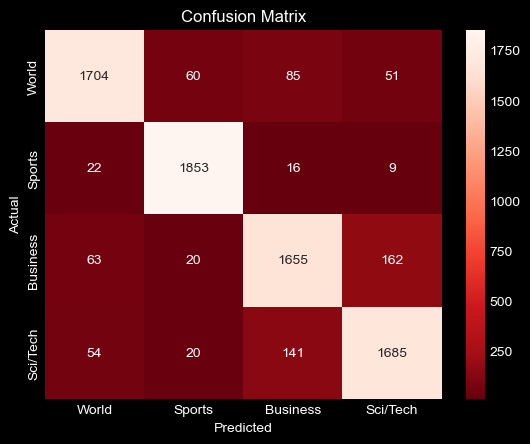

In [137]:
class_names = ["World", "Sports", "Business", "Sci/Tech"]
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds_r', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## most frequent words per category

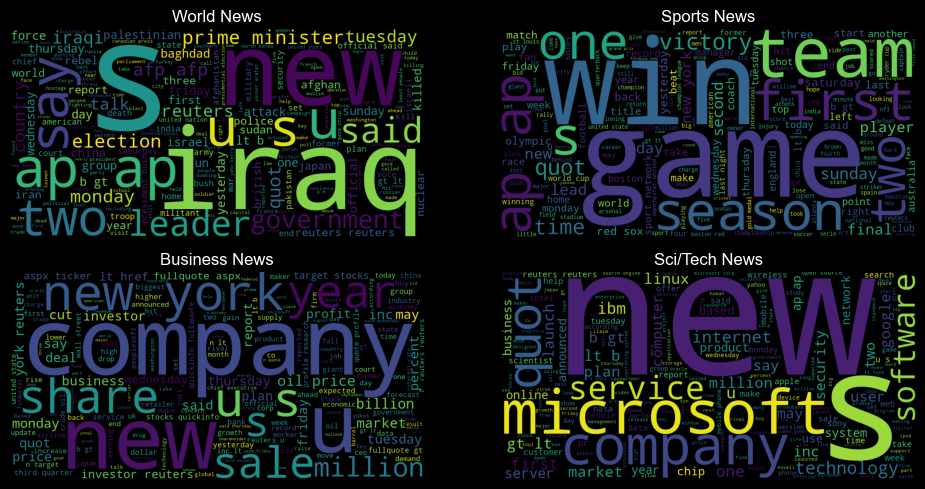

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fake news cloud
class1 = " ".join(testdf[testdf['Class Index'] == 1]['clean-text'])
class2 = " ".join(testdf[testdf['Class Index'] == 2]['clean-text'])
class3 = " ".join(testdf[testdf['Class Index'] == 3]['clean-text'])
class4 = " ".join(testdf[testdf['Class Index'] == 4]['clean-text'])


plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(WordCloud(width=1000, height=500).generate(class1))
plt.title("World News")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(WordCloud(width=1000, height=500).generate(class2))
plt.title("Sports News")
plt.axis('off')


plt.subplot(2,2,3)
plt.imshow(WordCloud(width=1000, height=500).generate(class3))
plt.title("Business News")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(WordCloud(width=1000, height=500).generate(class4))
plt.title("Sci/Tech News")
plt.axis('off')

plt.tight_layout()
plt.show()